In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
training_set = pd.read_csv('train.csv')

In [24]:
training_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
#смотрим,где больше всего отсутствуют данны,если данные отсутствуют(NaN),то True
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

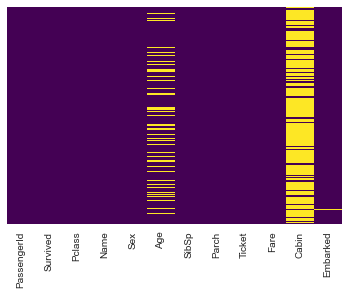

In [26]:
#черта соответстует True,где данные отсутствуют
sns.heatmap(training_set.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [27]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

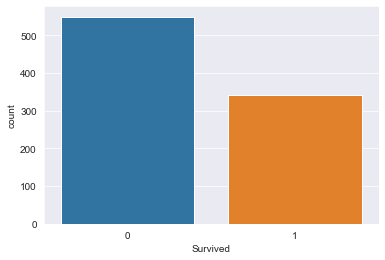

In [28]:
#например соотношение выжившых и невыжившых
sns.countplot(x='Survived',data=training_set)

<AxesSubplot:xlabel='Survived', ylabel='count'>

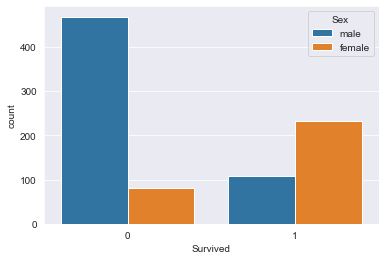

In [29]:
sns.countplot(x='Survived',data=training_set,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

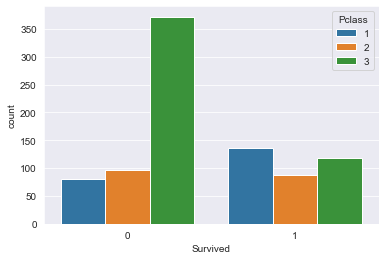

In [30]:
#выжившие от класса пассажиров
sns.countplot(x='Survived',data=training_set,hue='Pclass')

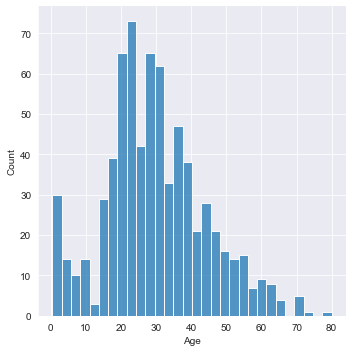

In [31]:
#возраст график распределения
sns.displot(training_set['Age'].dropna(),kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

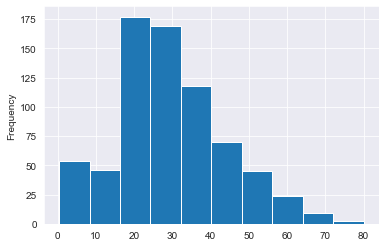

In [32]:
#визуализация,гистограмма возраста
training_set['Age'].plot.hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

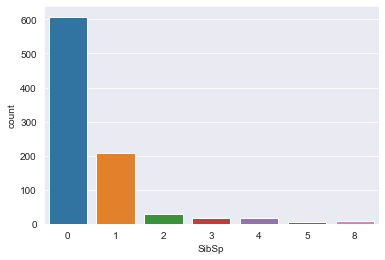

In [33]:
#сестры братья и супруги
sns.countplot(x='SibSp',data=training_set)

In [34]:
#стоимость билетов на титанике
training_set['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:>

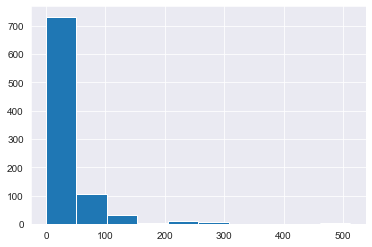

In [35]:
training_set['Fare'].hist()

<AxesSubplot:>

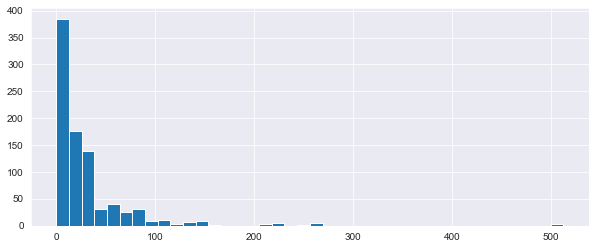

In [36]:
#видим,что основная масса билетов стоила 10$
training_set['Fare'].hist(bins=40,figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

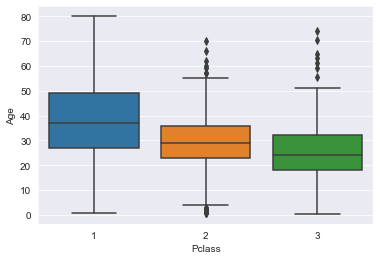

In [37]:
#РАБОТА С ОТСУТСТВУЮЩИМИ ДАННЫМИ.Отсутствующие данные в возрасте заменим средним значением(вычислим для каждого из 3-х классов путешественников свой)
sns.boxplot(x='Pclass',y='Age',data=training_set)

In [38]:
#создаем функцию для ввода данных,где они отсутствуют
def input_age(columns):
    Age = columns[0]
    Pclass = columns[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [39]:
training_set['Age'] = training_set[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

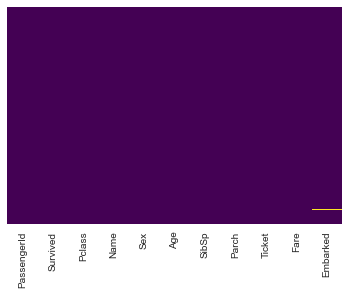

In [43]:
sns.heatmap(training_set.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [41]:
#отбрасываем ненужный столбец
training_set.drop('Cabin',axis=1,inplace = True)

In [42]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
